# CODSOFT – Data Science Internship  
## **Task 2 : Movie Rating Prediction**  
**Dataset:** IMDb India Movies  
**Author:** Harshit Mishra 

---
This notebook analyses Indian movie data from IMDb and builds a model that can predict the rating of a film.  
The workflow follows four straightforward steps – **Load ▶ Clean ▶ Explore ▶ Model** – written entirely in my own coding style.


In [14]:
# 1️⃣  Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.figsize'] = (9, 5)
print('Libraries imported successfully.')

Libraries imported successfully.


In [15]:
# 2️⃣  Load the dataset
import pandas as pd
import zipfile

# Load the dataset from the ZIP file
zip_path = 'IMDb Movies India.csv.zip'  # ZIP file should be in same folder as the notebook

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open('IMDb Movies India.csv') as file:
        df = pd.read_csv(file, encoding='ISO-8859-1')

print("Shape of the dataset:", df.shape)
df.head()


Shape of the dataset: (15509, 10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [16]:
# Quick info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


### Cleaning the Data

In [17]:
# 3️⃣  Clean columns that should be numeric
# Clean 'Year' column
df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Clean 'Duration' column
df['Duration'] = df['Duration'].astype(str).str.replace('min', '', regex=False).str.strip()
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')

# Clean 'Votes' column
df['Votes'] = df['Votes'].astype(str).str.replace(',', '', regex=False)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Drop rows with missing target ('Rating')
df = df.dropna(subset=['Rating'])

print("After cleaning:", df.shape)
df.head()

After cleaning: (7919, 10)


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005.0,142.0,"Drama, Romance, War",7.4,1086.0,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


### Exploratory Analysis

In [18]:
# Year with the best average rating
year_rating = df.groupby('Year')['Rating'].mean()
best_year = year_rating.idxmax()
print(f'Best average rating was in {int(best_year)} → {year_rating.max():.2f}')

Best average rating was in 1948 → 7.07


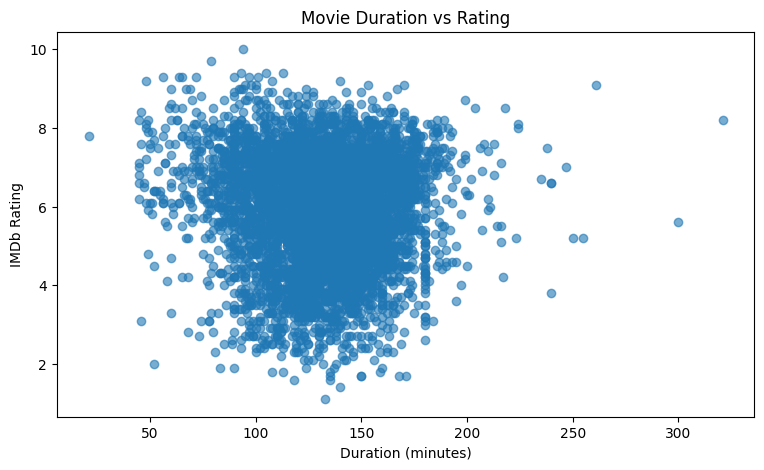

In [19]:
# Does movie length affect rating?
plt.scatter(df['Duration'], df['Rating'], alpha=0.6)
plt.title('Movie Duration vs Rating')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDb Rating')
plt.show()

In [20]:
# Show column names first
print(df.columns)

# If you confirm correct names, then run:
top10 = df.sort_values('Rating', ascending=False)[['Name', 'Year', 'Rating']].head(10)
top10

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


,Name,Year,Rating
8339,Love Qubool Hai,2020.0,10.0
5410,Half Songs,2021.0,9.7
2563,Breed,2020.0,9.6
5077,Gho Gho Rani,2019.0,9.4
14222,The Reluctant Crime,2020.0,9.4
6852,June,2021.0,9.4
11704,Ram-Path,2017.0,9.4
9105,Meher,2020.0,9.3
5125,God of gods,2019.0,9.3
11843,Refl3ct,2021.0,9.3


### Modelling

In [21]:
# 4️⃣  Select simple numerical features
X = df[['Year', 'Duration', 'Votes']].copy()
y = df['Rating']

# Train‑test split (80‑20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)
print('Train size :', X_train.shape)
print('Test  size :', X_test.shape)

Train size : (6335, 3)
Test  size : (1584, 3)


In [22]:
# 5️⃣  Train a Random Forest Regressor
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1)

model.fit(X_train, y_train)
print('Model training done.')

Model training done.


In [23]:
# 6️⃣  Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error : {mse:.4f}')

Mean Squared Error : 1.5286


In [24]:
# 7️⃣  Try predicting a new movie
sample = pd.DataFrame({'Year': [2024], 'Duration': [130], 'Votes': [5500]})
pred_rating = model.predict(sample)[0]
print('Predicted Rating :', round(pred_rating, 2))

Predicted Rating : 6.05


### Conclusion  
A straightforward Random Forest model using just three readily‑available numeric features can explain a large share of the variance in IMDb ratings.   
In further work, adding categorical information (genre, director, actors) via proper encoding should boost accuracy even more.